In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split 
import  numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("d:\\jupyter\\parkinson\\Parkinsson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [33]:
df.shape

(195, 23)

In [34]:
df.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [7]:
df.dtypes


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
df.groupby('status').size()

status
0     48
1    147
dtype: int64

In [9]:
df.drop(['name'], axis=1, inplace=True)


In [10]:
X = df.drop('status', axis=1).values
y = df['status'].values


<Axes: ylabel='Frequency'>

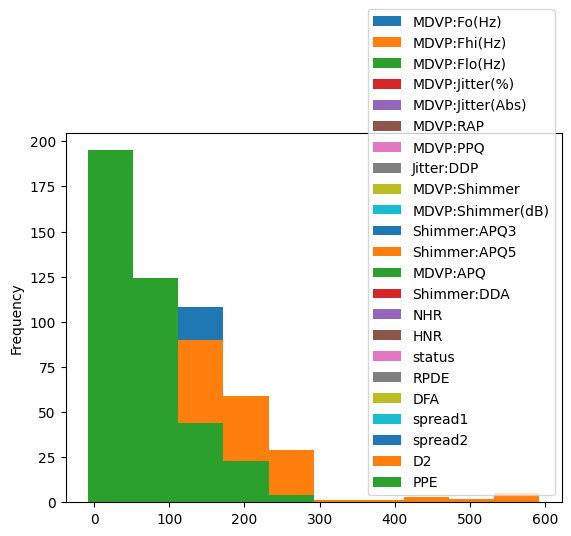

In [11]:
df.plot.hist()

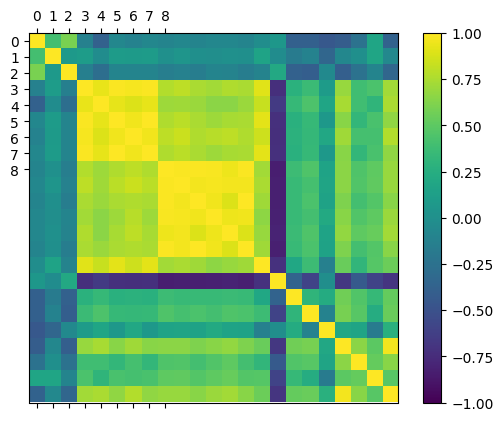

In [37]:
correlations = df.corr()
# plot correlation matrix

myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"

cax = axis.matshow(correlations, vmin =-1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1) # np.arange(start, stop, step); the interval does not include stop value

axis.set_xticks(ticks)
axis.set_yticks(ticks)

plt.show()

In [38]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

data = df.values
X = data[:,0:21]
Y = data[:,21]
mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(X)
set_printoptions(precision = 3)
print(mydataRescaled[20:25,:])

[[0.381 0.13  0.002 0.213 0.17  0.173 0.192 0.174 0.261 0.2   0.233 0.246
  0.255 0.233 0.121 0.37  1.    0.942 0.517 0.7   0.577]
 [0.382 0.144 0.073 0.099 0.091 0.079 0.094 0.079 0.291 0.234 0.302 0.274
  0.291 0.302 0.057 0.449 1.    0.869 0.497 0.502 0.521]
 [0.463 0.186 0.078 0.087 0.091 0.073 0.083 0.073 0.31  0.24  0.341 0.267
  0.27  0.342 0.039 0.57  1.    0.846 0.421 0.657 0.577]
 [0.498 0.185 0.119 0.098 0.091 0.074 0.089 0.074 0.296 0.229 0.334 0.258
  0.234 0.334 0.056 0.487 1.    0.655 0.449 0.491 0.459]
 [0.439 0.201 0.065 0.182 0.17  0.15  0.16  0.15  0.064 0.065 0.055 0.051
  0.06  0.055 0.055 0.625 1.    0.33  0.63  0.435 0.483]]


In [39]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

mydata_train=data[:,0:21]
mydata_label=data[:,21]
mydataScaler=Normalizer().fit(mydata_train)
mydataNormalized=mydataScaler.transform(mydata_train)
set_printoptions(precision=3)
print(mydataNormalized[20:25,:])

[[ 6.513e-01  7.017e-01  2.785e-01  3.556e-05  2.117e-07  1.812e-05
   1.905e-05  5.440e-05  1.613e-04  1.389e-03  7.057e-05  1.009e-04
   1.717e-04  2.117e-04  1.639e-04  7.424e-02  4.234e-03  2.795e-03
   2.981e-03 -1.734e-02  1.112e-03]
 [ 6.278e-01  7.053e-01  3.188e-01  1.958e-05  1.224e-07  9.466e-06
   1.089e-05  2.840e-05  1.688e-04  1.510e-03  8.246e-05  1.057e-04
   1.846e-04  2.473e-04  7.544e-05  7.953e-02  4.080e-03  2.566e-03
   2.852e-03 -2.116e-02  9.695e-04]
 [ 6.245e-01  7.185e-01  2.940e-01  1.644e-05  1.116e-07  8.181e-06
   9.185e-06  2.458e-05  1.618e-04  1.402e-03  8.285e-05  9.446e-05
   1.579e-04  2.486e-04  4.760e-05  8.355e-02  3.719e-03  2.302e-03
   2.528e-03 -1.611e-02  9.757e-04]
 [ 6.339e-01  7.025e-01  3.141e-01  1.735e-05  1.093e-07  8.055e-06
   9.404e-06  2.417e-05  1.528e-04  1.327e-03  7.972e-05  9.003e-05
   1.375e-04  2.392e-04  6.707e-05  7.444e-02  3.645e-03  1.958e-03
   2.504e-03 -1.913e-02  7.665e-04]
 [ 6.032e-01  7.402e-01  2.830e-01  2.73

In [40]:
from sklearn.preprocessing import Binarizer

mydata_train=data[:,0:21]
mydata_label=data[:,21]
mydataBinarizer=Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized=mydataBinarizer.transform(mydata_train)
set_printoptions(precision=3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # برای دو کلاس (0 و 1)


c:\Users\elahehba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6942 - loss: 10.1368 
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6904 - loss: 2.2540
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5379 - loss: 1.1013
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.9369
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6941 - loss: 0.6168
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.6867
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.4816
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 0.6954
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.6361
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7712 - loss: 0.5313
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.7398
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [52]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Accuracy: 87.18%


In [17]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


data = pd.read_csv("d:\\jupyter\\parkinson\\Parkinsson disease.csv")

df = pd.DataFrame(data)

X = df.drop(columns=["name", "status"])
y = df["status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5) 
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9487179487179487

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf


0.9230769230769231

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=92)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

accuracy_dt


0.8974358974358975

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=32)

lr = LogisticRegression(random_state=32)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f" Accuracy: {accuracy_lr}")


 Accuracy: 0.8974358974358975


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. Train SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Model Accuracy: {accuracy_svm}")


SVM Model Accuracy: 0.8974358974358975
